# Real Estate Sales in Melbourne
### The notebook of this project is an analysis of the database of real estate sales in Melbourne from 2016 to 2017. The features of the dataset includes Address, Type of Real Estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale, Distance from CBD, Land Size, Building Size and Number of Properties that exist in each suburb. The amount of data in this database has certain limitations, with less data available for the first quarter of 2016 and the fourth quarter of 2017. Despite the limitations above, other data volumes are very detailed and easy to analyze.
### For most stakeholders, the main concern is the price, so my first point is mainly to analyze which features will affect the housing price. 
Types: Unit,House and Townhouse.
* The price distribution of different types of housing.

location: With regions and suburbs.
* The price distribution of different location.

Rooms: With number of bedrooms,bathrooms and carports.
* The price distribution of number of rooms.


According to the data, I predict that the house price is mainly affected by the type of property. House is the most expensive, townhouse is the second, and unit is the cheapest. Secondly, in the case of the same type of house, the suburb where the house is located is a key factor in determining the property price. Finally, when the conditions of the first two features are the same, what determines the real estate price is the number of houses.

### Secondly, I will further summarize the real estate in Melbourne from 2016 to 2017.
* Which types of property have sold the most?
* Which sales method is easy to make deal？
* Which month sold the most in 2016 or 2017?
* Top 10 suburbs with highest sales.
* The correlation between built year and property price
* The correlation between land size and property price.

In [9]:
#import packages
import pandas as pd  
import numpy as np
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('/Users/DanYang/Desktop/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Data preprocessing

In [12]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [13]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Sold_year'] = pd.DatetimeIndex(df['Date']).year
df['Sold_month'] = pd.DatetimeIndex(df['Date']).month
df.drop(columns = ['Date'], inplace = True)
df.head()

/Users/DanYang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/DanYang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/DanYang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/DanYang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_year,Sold_month
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,...,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,3
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,...,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,4
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,...,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,4
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,...,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,2017,4
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,...,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,4


<AxesSubplot:xlabel='Car', ylabel='Count'>

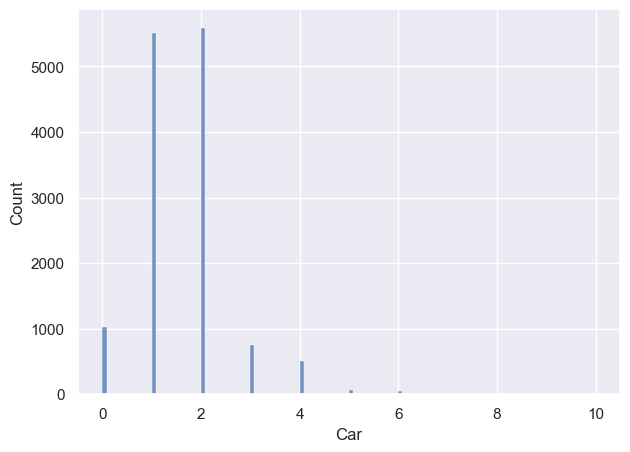

In [15]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(figsize=(7,5))
sns.histplot(df['Car'])

In [16]:
df[(df['Car'].isna())& (df['Type']=='h')]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_year,Sold_month
12221,Ascot Vale,132 The Parade,3,h,985000.0,S,Brad,4.3,3032.0,3.0,...,245.0,91.0,1945.0,NaN,-37.77215,144.91144,Western Metropolitan,6567.0,2017,3
12247,Brunswick East,18 Ethel St,2,h,1023000.0,S,Domain,4.0,3057.0,2.0,...,154.0,76.0,1890.0,NaN,-37.77221,144.97537,Northern Metropolitan,5533.0,2017,3
12259,Clifton Hill,34 Fenwick St,3,h,1436000.0,S,Jellis,3.6,3068.0,3.0,...,123.0,128.0,1990.0,NaN,-37.78888,145.00036,Northern Metropolitan,2954.0,2017,3
12320,Glen Waverley,19 Diamond Av,3,h,1370000.0,S,Fletchers,16.7,3150.0,3.0,...,652.0,NaN,NaN,NaN,-37.87170,145.17267,Eastern Metropolitan,15321.0,2017,3
12362,Newport,11 Collingwood Rd,4,h,1180000.0,PI,Williams,6.2,3015.0,4.0,...,545.0,NaN,NaN,NaN,-37.84399,144.89125,Western Metropolitan,5498.0,2017,3
12383,Port Melbourne,333 Princes St,3,h,1764000.0,S,Buxton,3.5,3207.0,3.0,...,131.0,133.0,1900.0,NaN,-37.83509,144.94224,Southern Metropolitan,8648.0,2017,3
12397,South Melbourne,303 Park St,2,h,1137000.0,S,hockingstuart,1.9,3205.0,2.0,...,126.0,79.0,NaN,NaN,-37.83704,144.95606,Southern Metropolitan,5943.0,2017,3
12426,Yarraville,54 Sussex St,3,h,890000.0,VB,Jas,6.3,3013.0,3.0,...,338.0,123.0,1906.0,NaN,-37.81950,144.88908,Western Metropolitan,6543.0,2017,3
12462,Carlton,81 Princes St,2,h,800000.0,VB,Woodards,1.6,3053.0,2.0,...,117.0,NaN,NaN,NaN,-37.79294,144.97283,Northern Metropolitan,6786.0,2017,9
12463,Carlton North,782 Lygon St,2,h,1065000.0,S,Nelson,3.5,3054.0,2.0,...,4025.0,NaN,NaN,NaN,-37.78791,144.96938,Northern Metropolitan,3106.0,2017,9


### Usually, unit has no parking space, so I choose 0 to fill null, while the parking space of house can be 1 or 2 without affecting data analysis, so I choose 1 to fill .

In [17]:
df.loc[(df['Car'].isna())& (df['Type']=='h'),'Car']= 1
df.loc[(df['Car'].isna())& (df['Type']=='u'),'Car']= 0

### Suburb and CouncilArea correspond one to one, so I create a dictionary to fill unknown CouncilArea with known relation.

In [18]:
pd.set_option('display.max_rows',500)
df_Suburb = df.groupby(['Suburb','CouncilArea'])['Address'].count().reset_index(name='count')

In [19]:
dict_Suburb = dict([(i,[x]) for i, x in zip(df_Suburb.Suburb,df_Suburb.CouncilArea)])
dict_Suburb

{'Abbotsford': ['Yarra'],
 'Aberfeldie': ['Moonee Valley'],
 'Airport West': ['Moonee Valley'],
 'Albanvale': ['Brimbank'],
 'Albert Park': ['Port Phillip'],
 'Albion': ['Brimbank'],
 'Alphington': ['Yarra'],
 'Altona': ['Hobsons Bay'],
 'Altona Meadows': ['Hobsons Bay'],
 'Altona North': ['Hobsons Bay'],
 'Ardeer': ['Brimbank'],
 'Armadale': ['Stonnington'],
 'Ascot Vale': ['Moonee Valley'],
 'Ashburton': ['Boroondara'],
 'Ashwood': ['Monash'],
 'Aspendale': ['Kingston'],
 'Aspendale Gardens': ['Kingston'],
 'Avondale Heights': ['Moonee Valley'],
 'Bacchus Marsh': ['Moorabool'],
 'Balaclava': ['Port Phillip'],
 'Balwyn': ['Boroondara'],
 'Balwyn North': ['Boroondara'],
 'Bayswater': ['Knox'],
 'Bayswater North': ['Maroondah'],
 'Beaconsfield': ['Cardinia'],
 'Beaconsfield Upper': ['Cardinia'],
 'Beaumaris': ['Bayside'],
 'Bellfield': ['Banyule'],
 'Bentleigh': ['Glen Eira'],
 'Bentleigh East': ['Glen Eira'],
 'Berwick': ['Casey'],
 'Black Rock': ['Bayside'],
 'Blackburn': ['Whitehorse

In [20]:
def isNaN(string):
    return string != string
for r, row in enumerate (df['CouncilArea'].values):
    if isNaN(row) and df['Suburb'][r] in dict_Suburb :
        df['CouncilArea'][r] = dict_Suburb[df['Suburb'][r]]

/var/folders/77/cr3w0dnx3ld3wl3dh7zz4p_r0000gn/T/ipykernel_17247/2512298341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CouncilArea'][r] = dict_Suburb[df['Suburb'][r]]


### After filling the Car and CouncilArea, I chose unknown to fill the remaining null because we didn't have any more relevant data.

In [21]:
df.fillna('unknown', inplace=True)
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Sold_year        0
Sold_month       0
dtype: int64

# Data Analytics

## Price analysis

### price distribution

<AxesSubplot:xlabel='Price', ylabel='Count'>

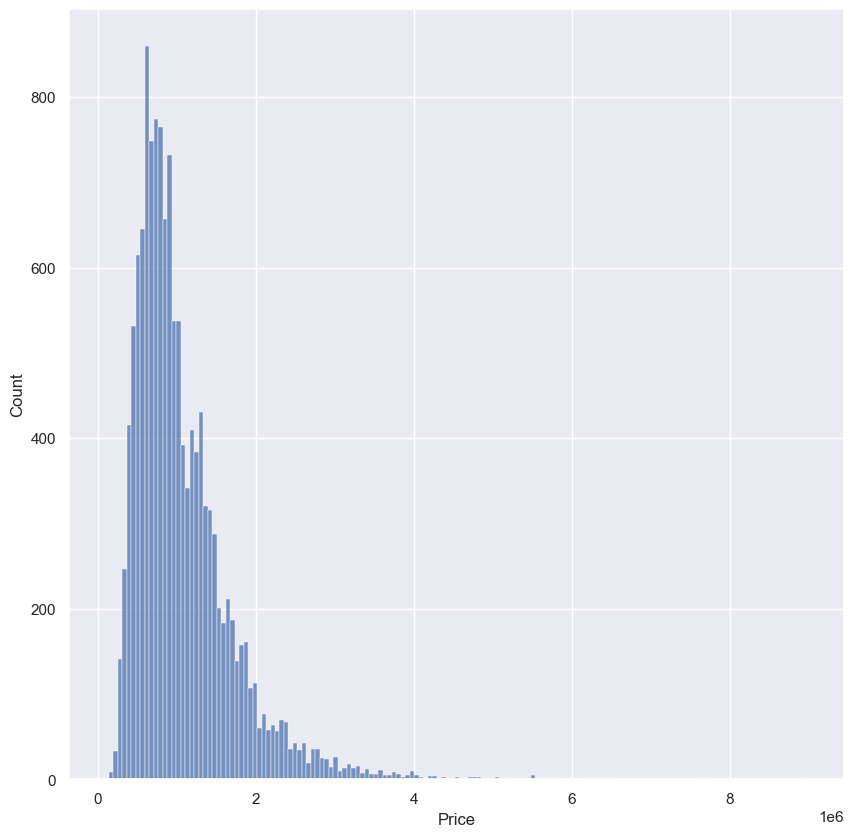

In [22]:
fig, axs = plt.subplots(figsize=(10,10))
sns.histplot(df['Price'])

### It can be seen from the figure above that there are few values greater than 3000000, so we cleared outlier selection for analysis of values less than 3000000.

In [23]:
# outlier 221 rows
df.loc[df['Price']>3000000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_year,Sold_month
102,Albert Park,97 Page St,3,h,3010000.0,S,Greg,3.3,3206.0,3.0,...,147.0,146.0,1890.0,Port Phillip,-37.84730,144.95510,Southern Metropolitan,3280.0,2017,3
108,Albert Park,115 Page St,4,h,4735000.0,S,Marshall,3.3,3206.0,4.0,...,330.0,207.0,1910.0,Port Phillip,-37.84770,144.95580,Southern Metropolitan,3280.0,2017,2
112,Albert Park,22 Greig St,3,h,3755000.0,S,Greg,3.3,3206.0,3.0,...,325.0,unknown,unknown,Port Phillip,-37.84130,144.95000,Southern Metropolitan,3280.0,2016,7
233,Armadale,11/17 Myamyn St,2,u,3625000.0,S,Jellis,6.3,3143.0,3.0,...,0.0,unknown,2006.0,Stonnington,-37.85550,145.02910,Southern Metropolitan,4836.0,2016,4
251,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,6.3,3143.0,5.0,...,1491.0,516.0,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836.0,2016,9
270,Armadale,61 Union St,4,h,3660000.0,S,Jellis,6.3,3143.0,4.0,...,421.0,unknown,unknown,Stonnington,-37.85930,145.02750,Southern Metropolitan,4836.0,2017,2
272,Armadale,44 Denbigh Rd,4,h,3625000.0,S,Jellis,6.3,3143.0,4.0,...,709.0,251.0,1900.0,Stonnington,-37.85740,145.01600,Southern Metropolitan,4836.0,2016,11
273,Armadale,44 Hampden Rd,4,h,4200000.0,VB,Kay,6.3,3143.0,4.0,...,563.0,333.0,2000.0,Stonnington,-37.85820,145.01380,Southern Metropolitan,4836.0,2016,11
275,Armadale,4 Mercer Rd,3,h,3512500.0,S,Marshall,6.3,3143.0,3.0,...,617.0,285.0,1998.0,Stonnington,-37.85570,145.02640,Southern Metropolitan,4836.0,2016,11
388,Ashburton,29A Yuile St,5,h,3510000.0,S,Jellis,11.0,3147.0,5.0,...,755.0,444.0,2015.0,Boroondara,-37.85980,145.07960,Southern Metropolitan,3052.0,2017,3


<AxesSubplot:xlabel='Price', ylabel='Count'>

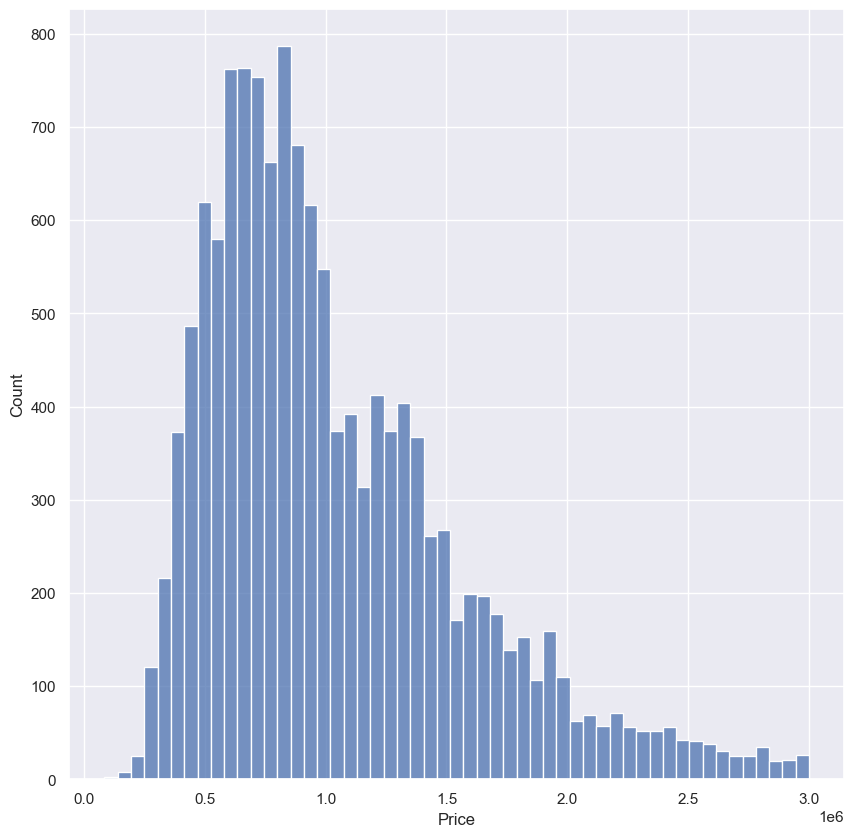

In [24]:
df_price = df.loc[df['Price'] <= 3000000]
fig, axs = plt.subplots(figsize=(10,10))
sns.histplot(df_price['Price'])



## The price distribution of different types of housing.

### Types: Unit,House and Townhouse.

In [25]:
df_house=df_price[df_price['Type']=='h']
df_house['Price'].median()

1060000.0

In [26]:
df_townhouse=df_price[df_price['Type']=='t']
df_townhouse['Price'].median()

845500.0

In [27]:
df_unit=df_price[df_price['Type']=='u']
df_unit['Price'].median()

560000.0

<AxesSubplot:xlabel='Price', ylabel='Count'>

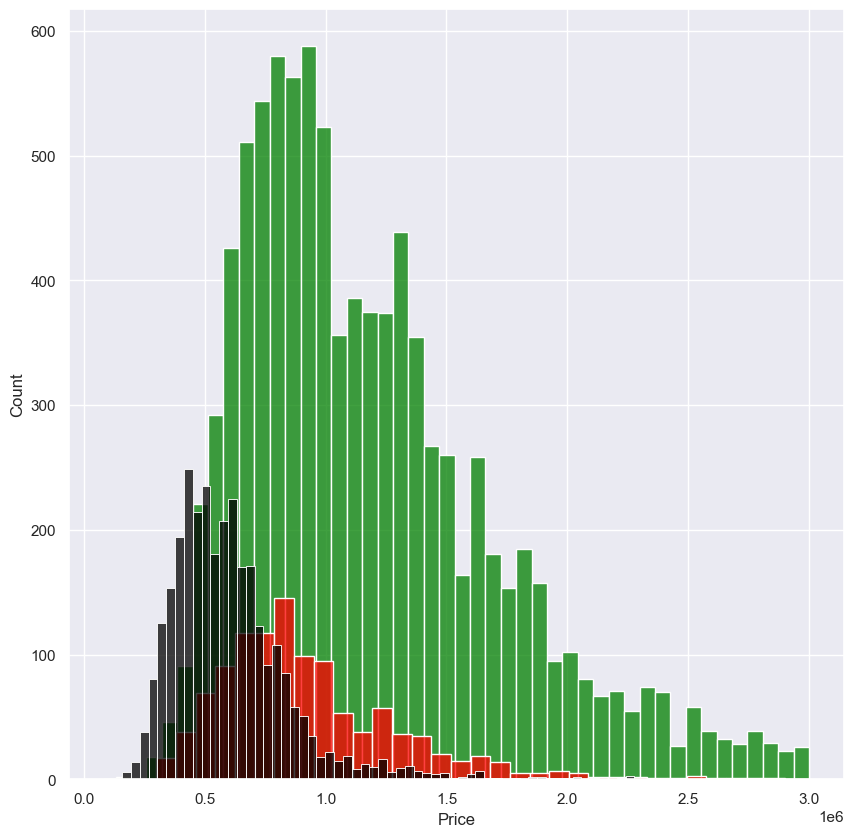

In [28]:
fig, axs = plt.subplots(figsize=(10,10))
sns.histplot(df_house['Price'],color = 'green')
sns.histplot(df_townhouse['Price'],color= 'red')
sns.histplot(df_unit['Price'],color = 'black')

### According to the above data, it can be seen that the housing type is the key feature affecting the housing price. From the median, it can be concluded that house is the most expensive, townhouse is the second,  and unit is the cheapest.




## The price distribution of different location.

### Region and price:

In [29]:
# number of Region  
df['Regionname'].nunique()

8

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

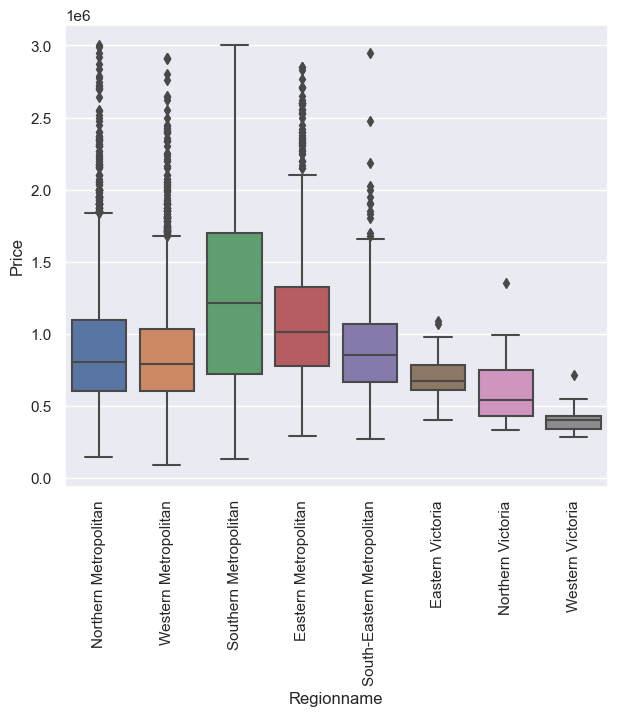

In [30]:
df_price = df.loc[df['Price'] <= 3000000]
fig, axs = plt.subplots(figsize=(7, 6))
sns.boxplot(x="Regionname", y="Price", data=df_price)
plt.xticks(rotation = 90)

###    According to the boxplot above, it can be seen that the region where the house is located will affect the housing price. Among the eight regions, the house price of Southern Metropolitan is the highest, and that of Eastern Metropolitan is the second. Western Victoria is the least expensive area.


### Next, I selected the region Southern Metropolitan with the highest price and the largest quantity to analyze the relationship between price and suburb.

### Suburb and price:

In [45]:
#df_suburb=df[(df['Regionname']=='Southern Metropolitan')].groupby('Suburb')['Address'].count().sort_values(ascending=False).head(15)

In [63]:
df_suburb_South= df[(df['Regionname']=='Southern Metropolitan')].groupby(['Suburb'])['Address'].count().reset_index(name='count')
df_suburb= df_suburb.sort_values(by= 'count',ascending=False).head(15)
df_suburb

,Suburb,count
9,Bentleigh East,249
55,South Yarra,202
29,Glen Iris,195
32,Hawthorn,191
11,Brighton,186
37,Kew,177
6,Balwyn North,171
57,St Kilda,162
50,Port Melbourne,153
16,Carnegie,146


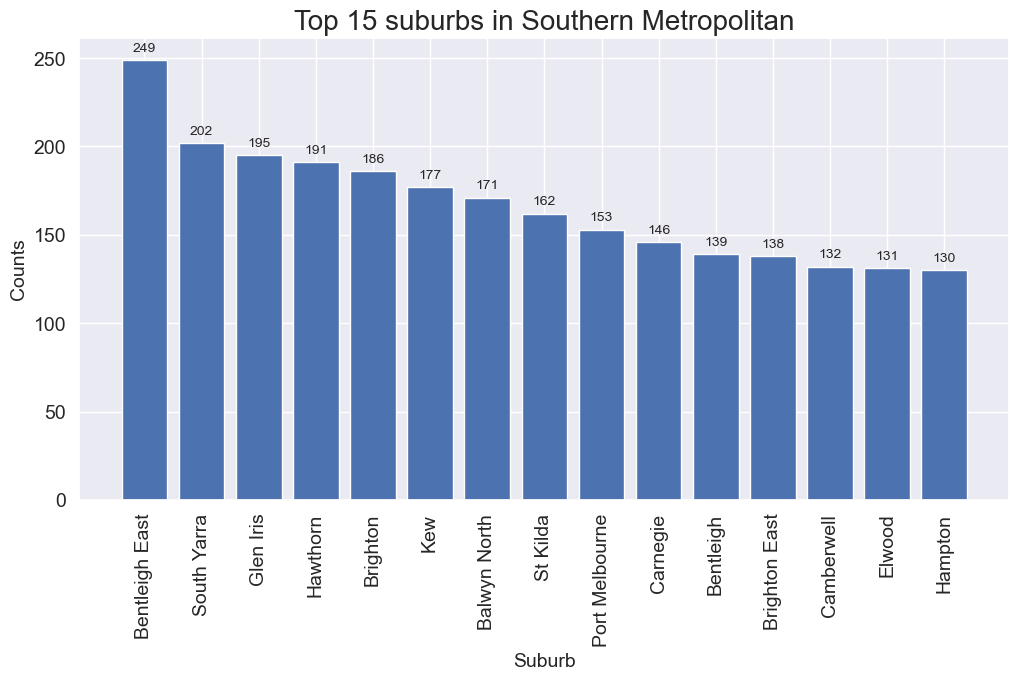

In [66]:
plt.figure(figsize=(12,6))
plt.bar(df_suburb['Suburb'],df_suburb['count'],color='b')
plt.title('Top 15 suburbs in Southern Metropolitan', fontsize=20)
plt.xlabel('Suburb', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
for a,b in zip(df_suburb['Suburb'],df_suburb['count']):
    plt.text(a, b+5, b, fontsize=10, ha='center')
plt.show()

* Above are the top 15 suburbs by number of property sales.


### Next, let's take a look at the relationship between the top 15 suburbs and price. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

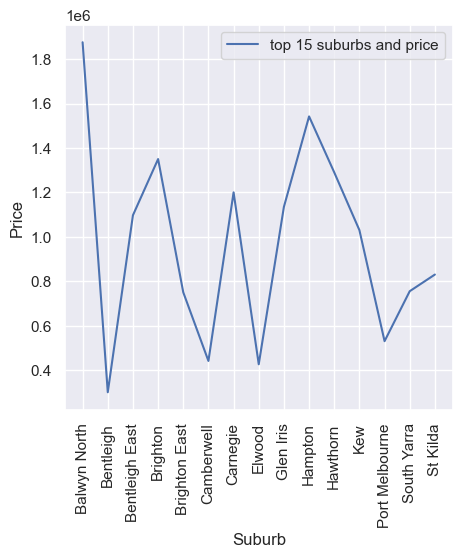

In [91]:
fig, axs = plt.subplots(figsize=(5, 5))
sns.lineplot(x=df_suburb['Suburb'], y=df['Price'],label='top 15 suburbs and price')
plt.xticks(rotation = 90)

###  I choose the top 300 with the highest price in Southern Metropolitan region to better analyze the relationship between suburbs and house price. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Canterbury'),
  Text(1, 0, 'Hawthorn'),
  Text(2, 0, 'Kew'),
  Text(3, 0, 'Middle Park'),
  Text(4, 0, 'Toorak'),
  Text(5, 0, 'Brighton'),
  Text(6, 0, 'South Yarra'),
  Text(7, 0, 'Armadale'),
  Text(8, 0, 'St Kilda'),
  Text(9, 0, 'Camberwell'),
  Text(10, 0, 'Malvern'),
  Text(11, 0, 'Malvern East'),
  Text(12, 0, 'Albert Park'),
  Text(13, 0, 'Prahran'),
  Text(14, 0, 'South Melbourne'),
  Text(15, 0, 'Balwyn'),
  Text(16, 0, 'Balwyn North'),
  Text(17, 0, 'Glen Iris'),
  Text(18, 0, 'Beaumaris'),
  Text(19, 0, 'Hawthorn East'),
  Text(20, 0, 'Port Melbourne'),
  Text(21, 0, 'Surrey Hills'),
  Text(22, 0, 'Elwood'),
  Text(23, 0, 'Ashburton'),
  Text(24, 0, 'Hampton'),
  Text(25, 0, 'Sandringham'),
  Text(26, 0, 'Brighton East'),
  Text(27, 0, 'Kooyong'),
  Text(28, 0, 'Kew East'),
  Text(29, 0, 'Elsternwick'),
  Text(30, 0, 'C

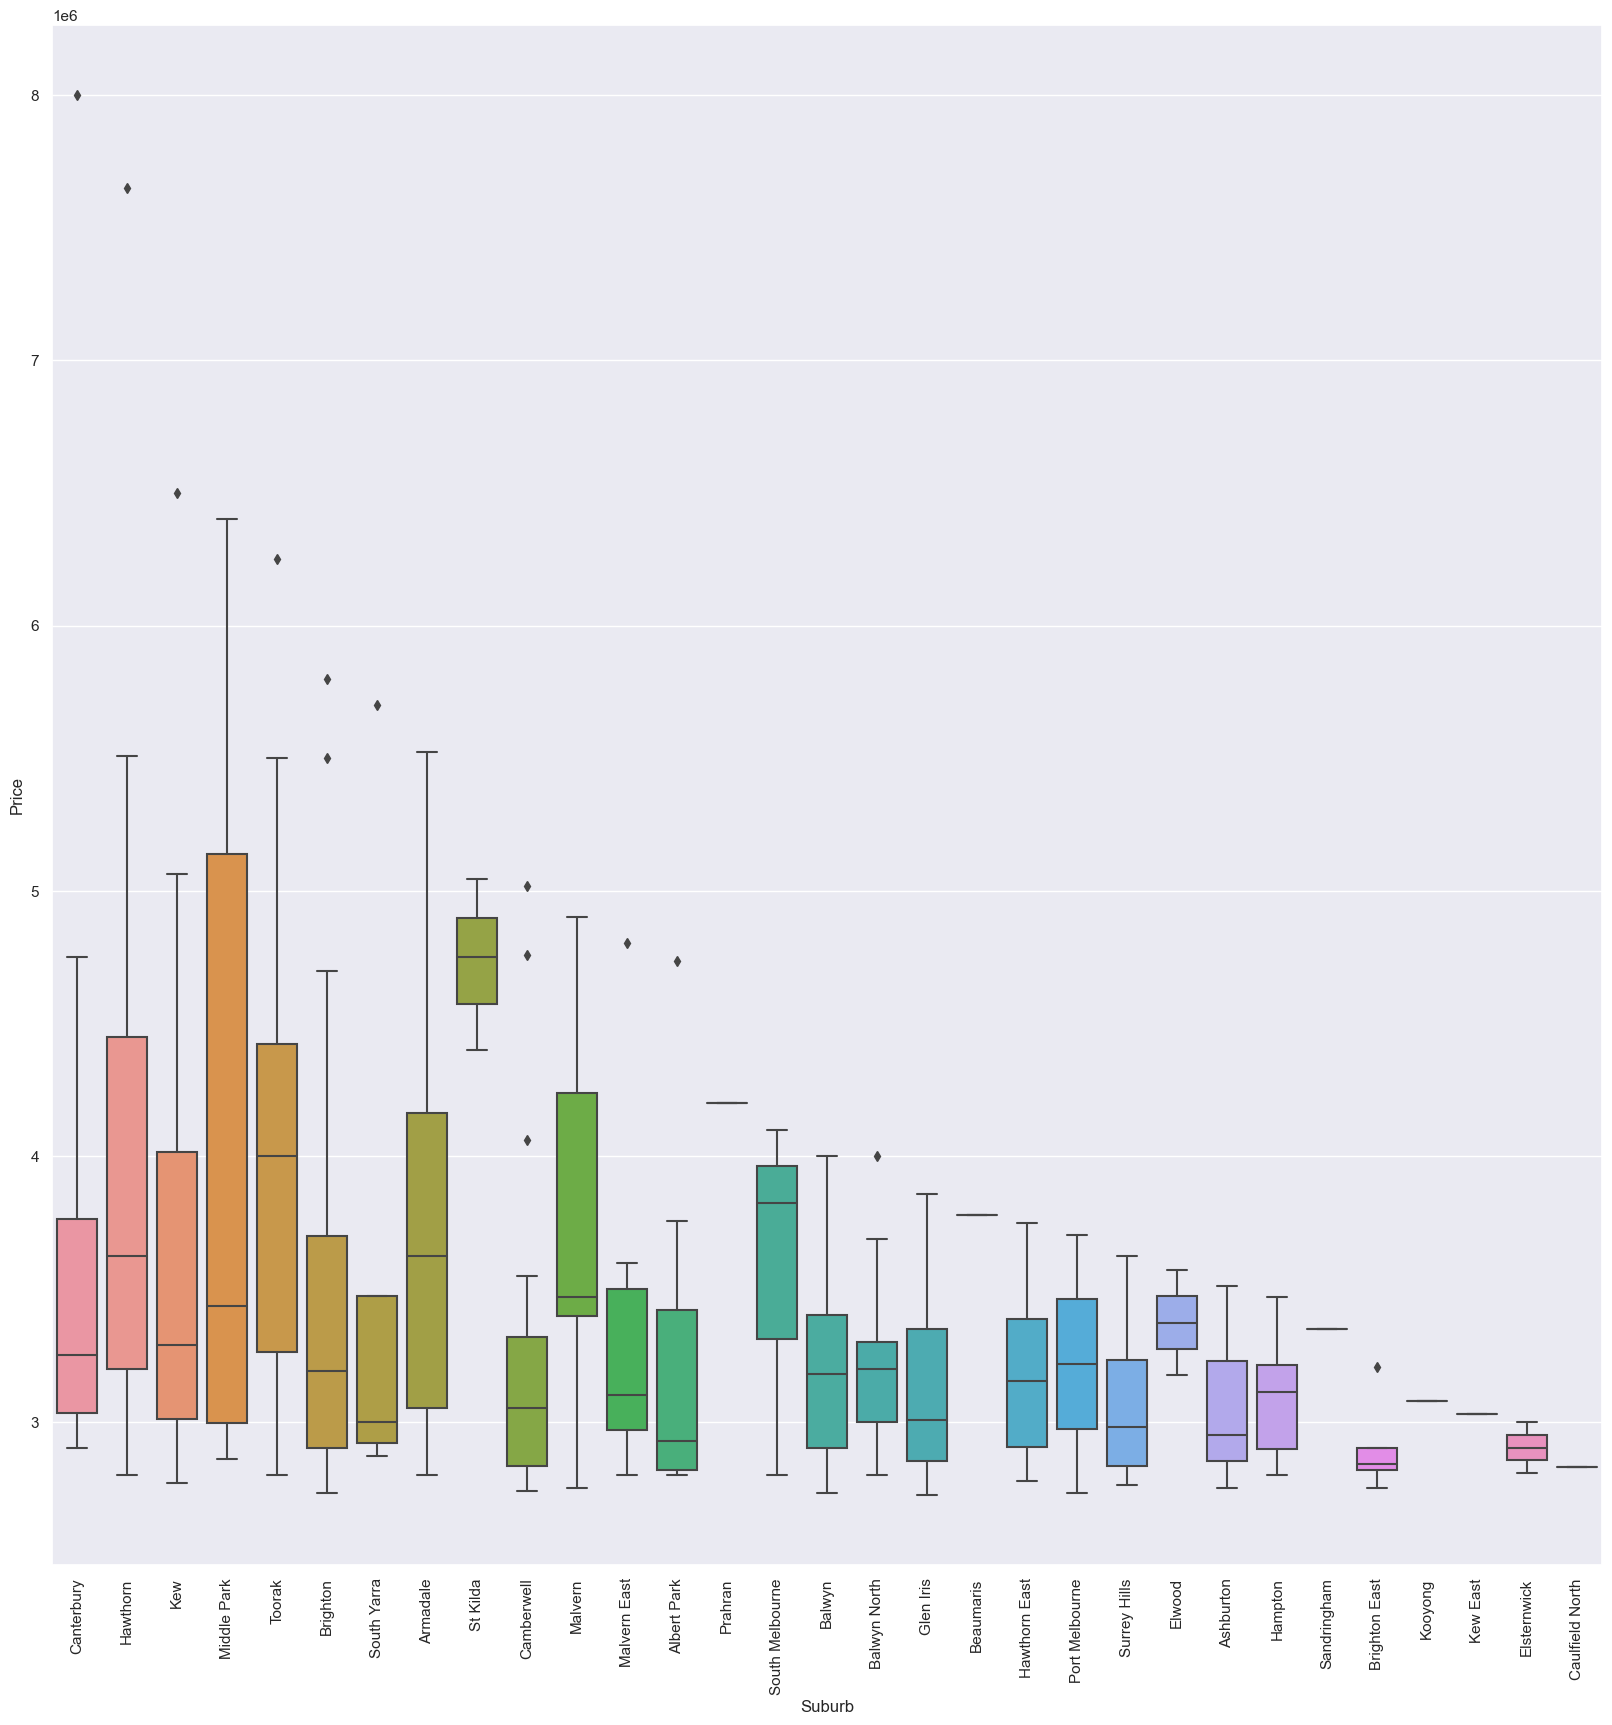

In [78]:
df_south = df.loc[(df['Regionname']=='Southern Metropolitan')].sort_values(by='Price',ascending = False).head(300)
fig, axs = plt.subplots(figsize=(20, 20))
sns.boxplot(x='Suburb', y='Price', data=df_south)
plt.xticks(rotation = 90)

* As can be seen from the picture above, prices do vary in different suburbs of the same region.

## The price distribution of number of rooms.
### In order to analyze the relationship between price and rooms, I selected Bentleigh East suburb with the highest sales volume in the Southern Metropolitan region.

In [33]:
df_ben = df[(df['Suburb']=='Bentleigh East')]
df_ben['Rooms'].unique()

array([2, 3, 1, 5, 4])

In [34]:
df_ben.groupby('Rooms')['Address'].count().reset_index(name='count')

,Rooms,count
0,1,3
1,2,36
2,3,139
3,4,62
4,5,9


<AxesSubplot:xlabel='Rooms', ylabel='Price'>

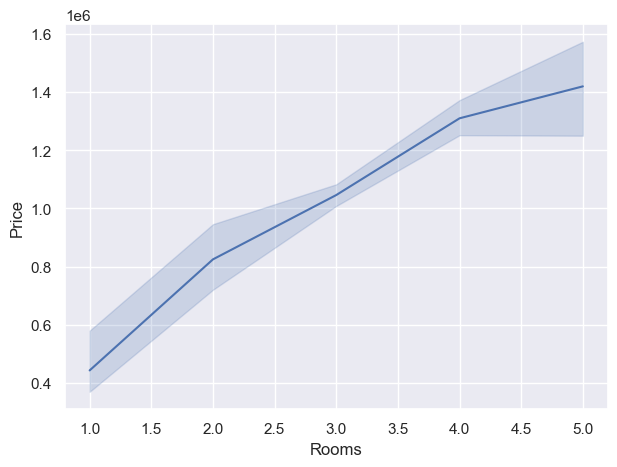

In [35]:
fig, axs = plt.subplots(figsize=(7, 5))
sns.lineplot(x="Rooms", y="Price", data=df_ben)

## According to the lineplot above, we can see that the number of rooms is positively correlated, and the higher the number of rooms, the higher the price.


## So next, we will analyze the relationship between Price and the number of bedrooms,bathrooms and carports.

<AxesSubplot:xlabel='Car', ylabel='Price'>

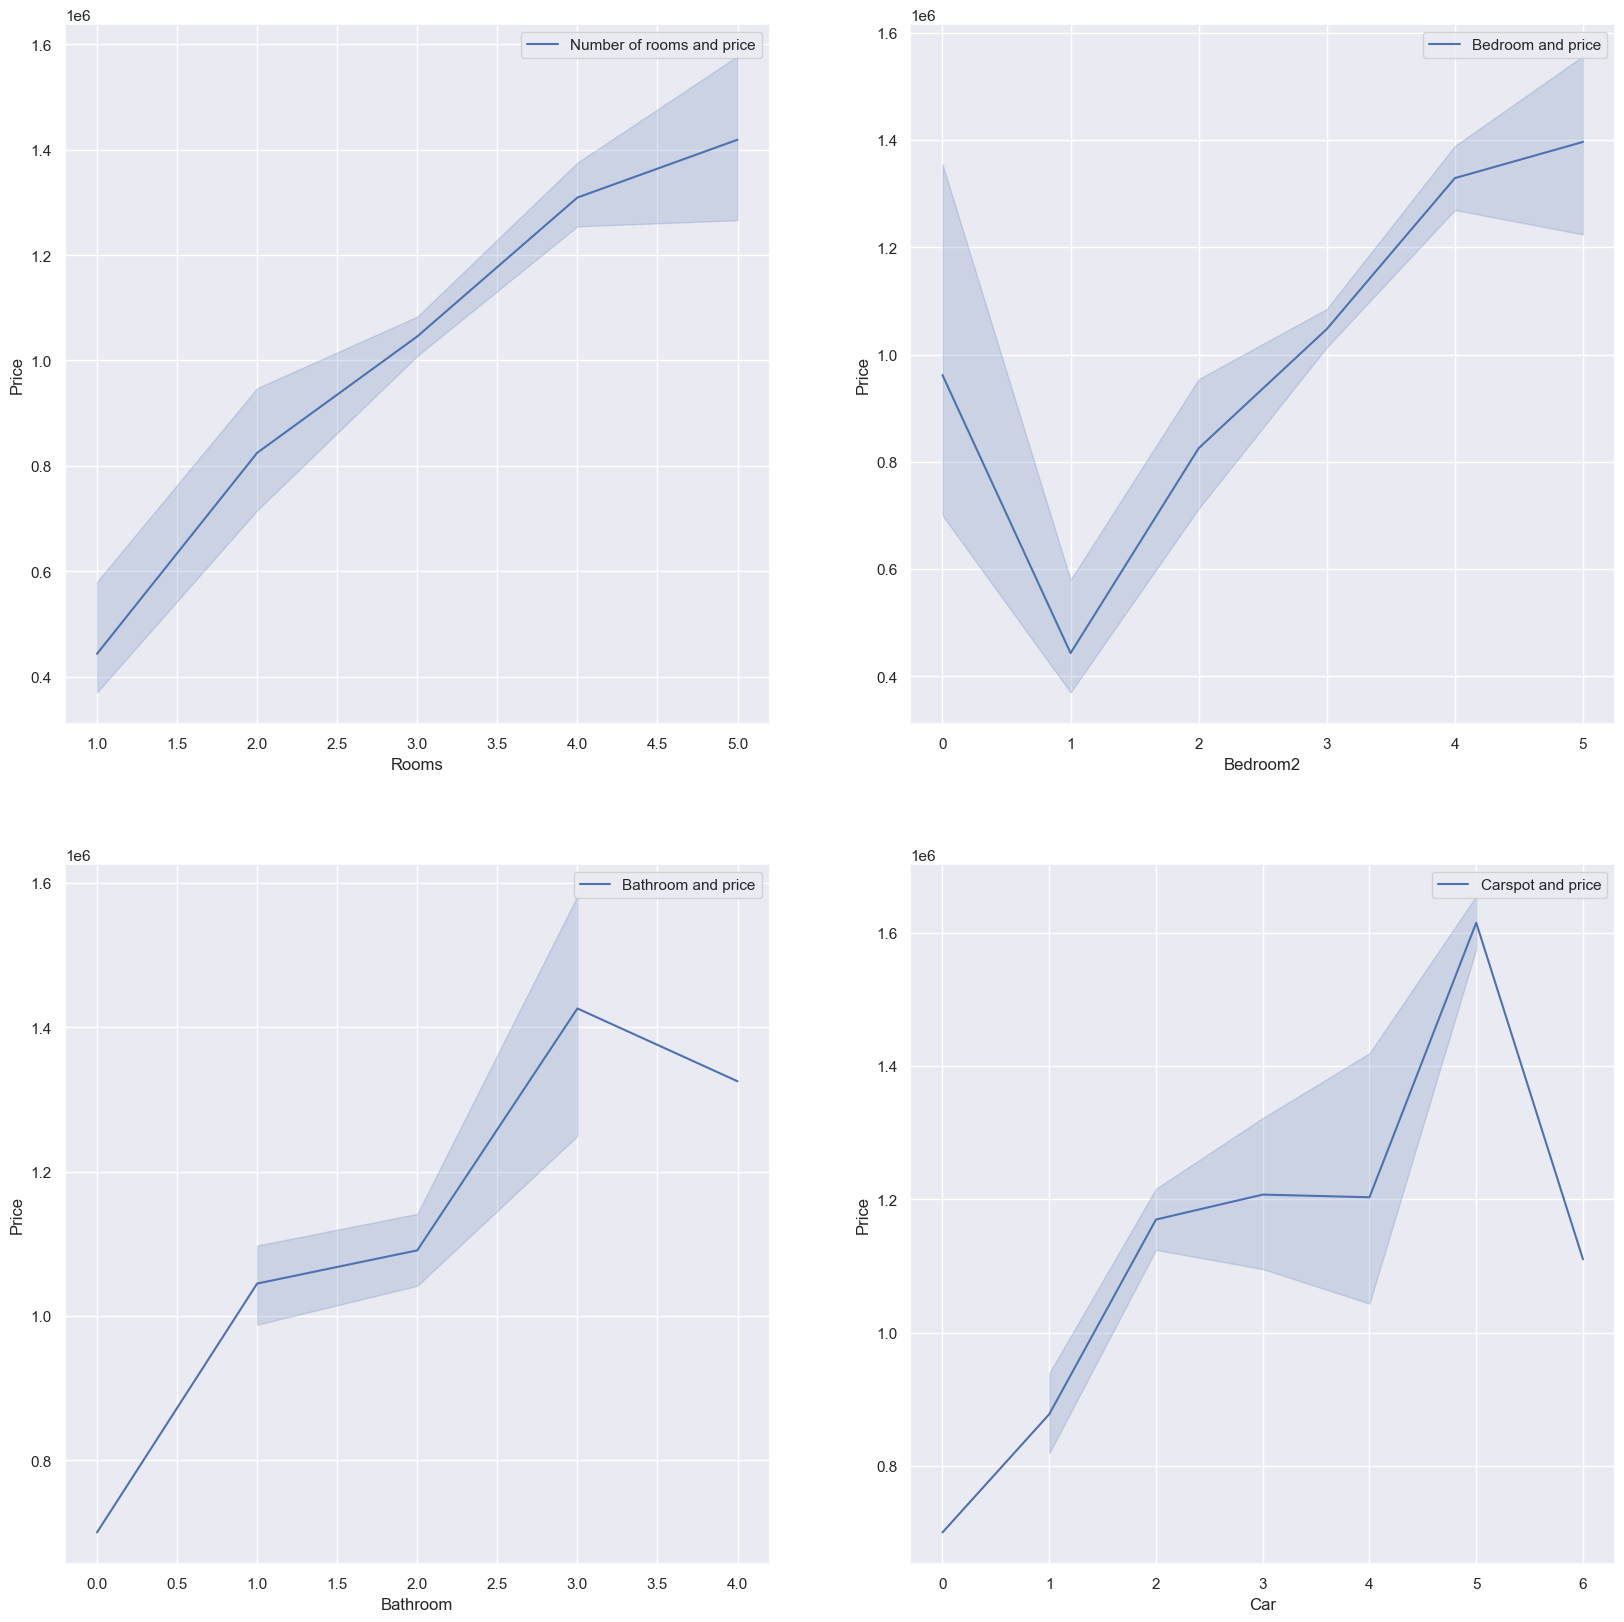

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
sns.lineplot(x="Rooms", y="Price", data=df_ben, label ='Number of rooms and price',ax = axs[0][0])
sns.lineplot(x="Bedroom2", y="Price", data=df_ben,label ='Bedroom and price',ax = axs[0][1])
sns.lineplot(x="Bathroom", y="Price", data=df_ben,label ='Bathroom and price',ax = axs[1][0])
sns.lineplot(x="Car", y="Price", data=df_ben,label ='Carspot and price',ax = axs[1][1])

### From the figure above, we can see that the data of number of bedrooms,bathrooms and carports are not accurate or abundant enough. In order to better analyze the relationship between the three and housing price, I choose more accurate data for analysis.

In [68]:
df[df['Bedroom2'] == 0]
# 16 rows

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_year,Sold_month
135,Alphington,7/7 Chandler Hwy,2,t,650000.0,SP,Brace,6.4,3078.0,0.0,...,0.0,unknown,unknown,Yarra,-37.78480,145.02500,Northern Metropolitan,2211.0,2016,9
804,Bentleigh East,17a Edinburgh St,3,t,830000.0,PI,Buxton,13.9,3165.0,0.0,...,292.0,141.0,2012.0,Glen Eira,-37.91680,145.06900,Southern Metropolitan,10969.0,2016,4
827,Bentleigh East,7 Wallace St,3,h,1355000.0,S,Buxton,13.9,3165.0,0.0,...,818.0,unknown,unknown,Glen Eira,-37.92410,145.05390,Southern Metropolitan,10969.0,2016,8
913,Bentleigh East,579 Warrigal Rd,3,h,700000.0,S,Thomson,13.9,3165.0,0.0,...,456.0,unknown,unknown,Glen Eira,-37.93140,145.08080,Southern Metropolitan,10969.0,2016,5
2253,Elsternwick,5/29 Nepean Hwy,2,u,410000.0,VB,Gary,8.5,3185.0,0.0,...,0.0,unknown,unknown,Glen Eira,-37.88630,144.99960,Southern Metropolitan,4898.0,2016,5
3360,Ivanhoe,20 Locksley Rd,4,h,2400000.0,S,Jellis,7.9,3079.0,0.0,...,1252.0,201.0,1920.0,Banyule,-37.77270,145.04840,Eastern Metropolitan,5549.0,2016,4
6170,Surrey Hills,14 Scheele St,3,h,1560000.0,S,hockingstuart,11.2,3127.0,0.0,...,335.0,209.0,2013.0,Boroondara,-37.81650,145.09810,Southern Metropolitan,5457.0,2016,9
6866,East Melbourne,9/35 Powlett St,2,u,872000.0,S,Dingle,1.5,3002.0,0.0,...,0.0,unknown,unknown,Melbourne,-37.81540,144.98510,Northern Metropolitan,3040.0,2016,5
6893,Fawkner,4 Lord St,3,h,585000.0,S,hockingstuart,12.4,3060.0,0.0,...,605.0,103.0,1960.0,Moreland,-37.69850,144.96150,Northern Metropolitan,5070.0,2016,6
7385,South Kingsville,55 Saltley St,3,h,1030000.0,SP,Barlow,9.1,3015.0,0.0,...,224.0,unknown,unknown,Hobsons Bay,-37.82980,144.86790,Western Metropolitan,984.0,2016,5


In [69]:
df[df['Bathroom'] >= 4]
# 143 rows

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_year,Sold_month
124,Alphington,83 Fulham Rd,5,h,2840000.0,S,Nelson,6.4,3078.0,5.0,...,809.0,165.0,1910.0,Darebin,-37.77500,145.02680,Northern Metropolitan,2211.0,2016,12
379,Ashburton,115 Ashburn Gr,8,h,2950000.0,S,hockingstuart,11.0,3147.0,9.0,...,1472.0,618.0,2009.0,Boroondara,-37.87290,145.07880,Southern Metropolitan,3052.0,2016,10
388,Ashburton,29A Yuile St,5,h,3510000.0,S,Jellis,11.0,3147.0,5.0,...,755.0,444.0,2015.0,Boroondara,-37.85980,145.07960,Southern Metropolitan,3052.0,2017,3
392,Ashburton,15 Comas Gr,5,h,2752000.0,S,Jellis,11.0,3147.0,6.0,...,1075.0,390.0,2010.0,Boroondara,-37.87140,145.07300,Southern Metropolitan,3052.0,2016,8
446,Avondale Heights,6 Lovett Dr,4,h,1200000.0,S,Nelson,10.5,3034.0,4.0,...,673.0,unknown,unknown,Moonee Valley,-37.75450,144.87360,Western Metropolitan,4502.0,2016,4
513,Balwyn,4 Melba Ct,5,h,3250000.0,PI,hockingstuart,9.7,3103.0,5.0,...,651.0,410.0,unknown,Boroondara,-37.80710,145.09080,Southern Metropolitan,5682.0,2016,3
515,Balwyn,349 Union Rd,6,h,4000000.0,VB,Jellis,9.7,3103.0,6.0,...,2051.0,449.0,1935.0,Boroondara,-37.80510,145.10160,Southern Metropolitan,5682.0,2016,3
556,Balwyn,2 Birtles Ct,5,h,3000000.0,VB,Jellis,9.7,3103.0,5.0,...,671.0,unknown,unknown,Boroondara,-37.80250,145.06650,Southern Metropolitan,5682.0,2016,6
557,Balwyn,49 Metung St,5,h,3400000.0,VB,Jellis,9.7,3103.0,5.0,...,739.0,502.0,unknown,Boroondara,-37.80390,145.07140,Southern Metropolitan,5682.0,2016,6
573,Balwyn,8 Raynes St,5,h,4000000.0,VB,RT,9.7,3103.0,5.0,...,1437.0,unknown,unknown,Boroondara,-37.80580,145.08820,Southern Metropolitan,5682.0,2016,11


In [70]:
df[df['Car'] >= 5]
# 138 rows

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_year,Sold_month
51,Airport West,3 Deidre Ct,3,h,895000.0,PI,Rendina,13.5,3042.0,3.0,...,1063.0,133.0,1975.0,Moonee Valley,-37.72490,144.87280,Western Metropolitan,3464.0,2016,10
61,Airport West,138 Victory Rd,3,h,1042000.0,S,Nelson,13.5,3042.0,3.0,...,612.0,174.0,1950.0,Moonee Valley,-37.71730,144.87960,Western Metropolitan,3464.0,2016,7
146,Altona,29 Rose St,4,h,1780000.0,SP,Greg,13.8,3018.0,4.0,...,1057.0,220.0,1962.0,Hobsons Bay,-37.86810,144.81900,Western Metropolitan,5301.0,2016,4
186,Altona North,45 Hearn St,5,h,1085000.0,S,FN,11.1,3025.0,5.0,...,592.0,251.0,1965.0,Hobsons Bay,-37.83880,144.85670,Western Metropolitan,5132.0,2016,3
318,Ascot Vale,125 Epsom Rd,4,h,1100000.0,VB,Nelson,5.9,3032.0,4.0,...,559.0,195.0,1920.0,Moonee Valley,-37.77910,144.91360,Western Metropolitan,6567.0,2016,10
476,Avondale Heights,11 South Tce,3,h,850000.0,SP,Moonee,10.5,3034.0,3.0,...,585.0,unknown,unknown,Moonee Valley,-37.75100,144.85710,Western Metropolitan,4502.0,2017,2
515,Balwyn,349 Union Rd,6,h,4000000.0,VB,Jellis,9.7,3103.0,6.0,...,2051.0,449.0,1935.0,Boroondara,-37.80510,145.10160,Southern Metropolitan,5682.0,2016,3
580,Balwyn,29 Sevenoaks St,5,h,3900000.0,PI,Jellis,9.7,3103.0,5.0,...,0.0,unknown,unknown,Boroondara,-37.80490,145.07480,Southern Metropolitan,5682.0,2016,8
663,Balwyn North,1 Morris St,6,h,1900000.0,VB,hockingstuart,9.2,3104.0,6.0,...,691.0,5.0,unknown,Boroondara,-37.80220,145.07750,Southern Metropolitan,7809.0,2016,5
676,Balwyn North,16 Nevada St,4,h,1700000.0,VB,Jellis,9.2,3104.0,3.0,...,754.0,175.0,1960.0,Boroondara,-37.78600,145.08860,Southern Metropolitan,7809.0,2016,6


In [72]:
df_bedroom = df[df['Bedroom2']>0]
df_bathroom = df[df['Bathroom'] < 4]
df_car = df[df['Car'] < 5]

<AxesSubplot:xlabel='Car', ylabel='Price'>

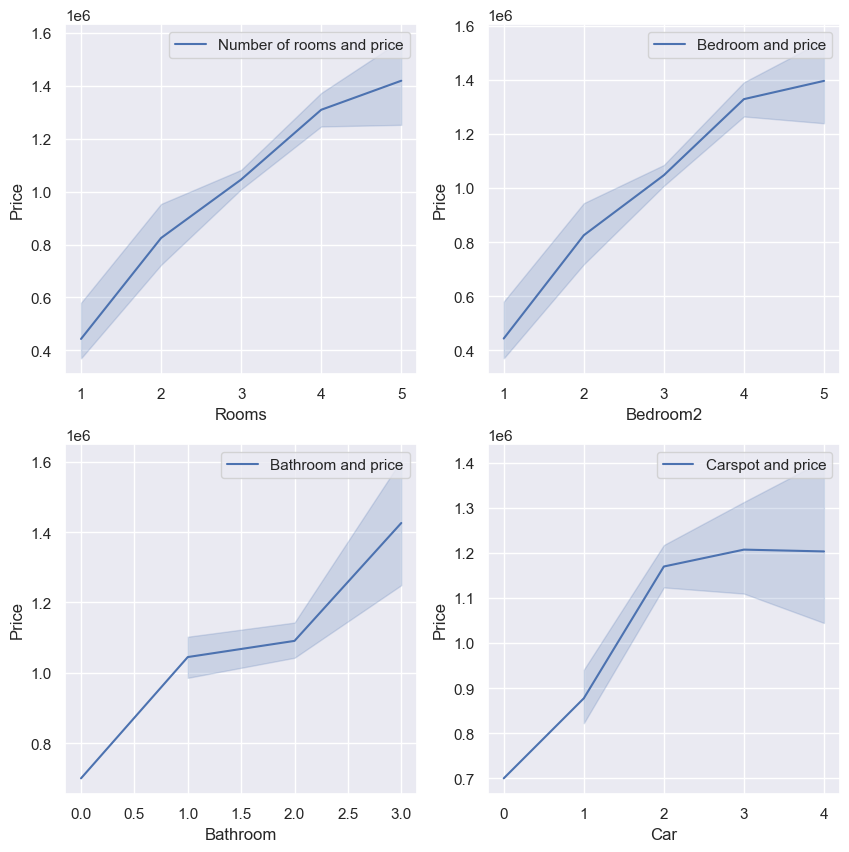

In [77]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.lineplot(x="Rooms", y="Price", data=df_ben, label ='Number of rooms and price',ax = axs[0][0])
sns.lineplot(x=df_bedroom["Bedroom2"], y="Price", data=df_ben,label ='Bedroom and price',ax = axs[0][1])
sns.lineplot(x=df_bathroom["Bathroom"], y="Price", data=df_ben,label ='Bathroom and price',ax = axs[1][0])
sns.lineplot(x=df_car["Car"], y="Price", data=df_ben,label ='Carspot and price',ax = axs[1][1])

* As can be seen from the chart above, the other three are also positively correlated with housing prices in general.

## Part 1 Summary
### Let's conclude the first part of the data analysis with a brief overview of the main findings.
### 1.The first thing that determines the property price is the type of real estate: 
* Among the three types of Unit,House and Townhouse, house has the highest price, Townhouse is the second, and Unit is the cheapest and almost half of house price.
### 2.The region where the house is located will affect the property price:
* Among the eight regions of Northern Metropolitan,Western Metropolitan,Southern Metropolitan,Eastern Metropolitan,South-Eastern Metropolitan,Eastern Victoria,Northern Victoria,Western Victoria,the property price of Southern Metropolitan is the highest, and that of Eastern Metropolitan is the second. Western Victoria is the least expensive area.
### 3.The number of rooms is positively correlated, and the higher the number of rooms, the higher the price:
* The number of bedrooms and house prices have the highest correlation.
* Among the number of bathroom, there is little difference between one and two,if more than two bathrooms, the price will increase greatly.
* In the number of carsport, the house price of carsport with less than two increases greatly, and the number of carsport with more than two has no great influence on the price.

# Next,  I will further summarize the real estate in Melbourne from 2016 to 2017.

Question: Which types of property have sold the most?

Asnwer:

In [84]:
df.groupby('Type')['Suburb'].count().reset_index(name='count')

,Type,count
0,h,9449
1,t,1114
2,u,3017


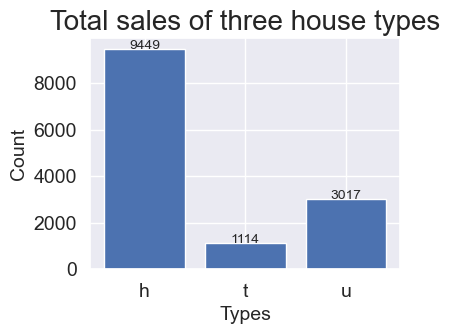

In [86]:
df_type_count=df.groupby('Type')['Suburb'].count().reset_index(name='count')
plt.figure(figsize=(4,3))
plt.bar(df_type_count['Type'],df_type_count['count'],color='b')
plt.title('Total sales of three house types', fontsize=20)
plt.xlabel('Types', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=0)
for a,b in zip(df_type_count['Type'],df_type_count['count']):
    plt.text(a, b+5, b, fontsize=10, ha='center')
plt.show()

Question:Which sales method is easy to make deal？

Asnwer:

In [87]:
df.groupby('Method')['Address'].count().reset_index(name='count')

,Method,count
0,PI,1564
1,S,9022
2,SA,92
3,SP,1703
4,VB,1199


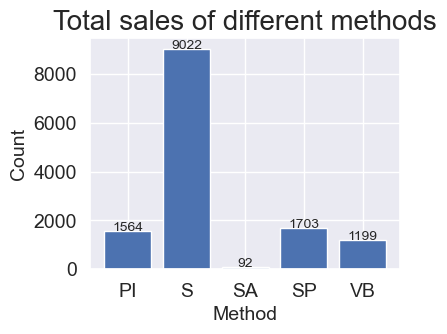

In [88]:
df_method_count=df.groupby('Method')['Address'].count().reset_index(name='count')
plt.figure(figsize=(4,3))
plt.bar(df_method_count['Method'],df_method_count['count'],color='b')
plt.title('Total sales of different methods', fontsize=20)
plt.xlabel('Method', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=0)
for a,b in zip(df_method_count['Method'],df_method_count['count']):
    plt.text(a, b+5, b, fontsize=10, ha='center')
plt.show()

Question: Which month sold the most in 2016?

Asnwer:

Question:Top 10 suburbs with highest sales.

Asnwer:

Question:The correlation between built year and property price

Asnwer:

Question:The correlation between land size and property price.

Asnwer: